# Example usage

In this notebook, I will demonstrate how to use `msions` to create MS TIC and ion plots.

## Imports

In [13]:
import msions.mzml as mzml
import msions.hardklor as hk
import msions.percolator as perc
import msions.kronik as kro
import msions.msplot as msplot

## Create DataFrame from mzML file
`tic_df` will create a pandas DataFrame from an mzML file.

In [14]:
ms1_df = mzml.tic_df("example_files/DIA_file.mzML")

## Read Hardklor file
`hk2df` will read a Hardklor tab-delimited file into a pandas DataFrame. After import, all columns that can be converted to a numeric data type will be.

In [15]:
hk_df = hk.hk2df("example_files/DIA_hk.hk")

`summarize_df` will summarize the TIC in each scan from a Hardklor pandas DataFrame or Hardklor tab-delimited file. 

In [16]:
hk.summarize_df(hk_df)

,rt,scan_num,TIC
0,0.0051,1,14409796
1,0.0574,152,15346213
2,0.1091,303,16216937
3,0.1607,454,16422145
4,0.2124,605,15524068
...,...,...,...
2493,99.9866,291311,108058
2494,99.9897,291312,24495
2495,99.9927,291313,51831
2496,99.9958,291314,424145


If an additional pandas DataFrame is provided with the MS1 scan information, the ion injection time will be mapped to each scan.

In [17]:
hk.summarize_df(hk_df, ms1_df)

,rt,scan_num,TIC,IT,ions
0,0.0051,1,14409796,50.000000,720489.800000
1,0.0574,152,15346213,40.343060,619113.184769
2,0.1091,303,16216937,40.586967,658196.294454
3,0.1607,454,16422145,43.578297,715649.106626
4,0.2124,605,15524068,40.905605,635021.398509
...,...,...,...,...,...
2493,99.9866,291311,108058,50.000000,5402.900000
2494,99.9897,291312,24495,50.000000,1224.750000
2495,99.9927,291313,51831,50.000000,2591.550000
2496,99.9958,291314,424145,50.000000,21207.250000


## Parse XML files from percolator output
`psms2df` will create a pandas DataFrame from a percolator XML output file.

In [18]:
perc.psms2df("example_files/DDA_xml.xml")

,peptide,protein_s,q_value,exp_mass,calc_mass,scan_num
0,GLTEGLHGFHVHEFGDNTAGCTSAGPHFNPLSR,sp|P00441|SODC_HUMAN,0.000051,3519.6244,3519.625,61906
1,RPLVLQLVNATTEYAEFLHCK,sp|Q05193|DYN1_HUMAN,0.000051,2502.3204,2502.317,85433
2,CFEKNEAIQAAHDAVAQEGQCR,sp|P09936|UCHL1_HUMAN,0.000051,2532.1364,2532.135,44111
3,KVADALTNAVAHVDDMPNALSALSDLHAHK,sp|P69905|HBA_HUMAN,0.000051,3124.5885,3124.584,77319
4,HLSNVSSTGSIDMVDSPQLATLADEVSASLAK,sp|P10636|TAU_HUMAN,0.000051,3243.6075,3243.605,86851
...,...,...,...,...,...,...
68399,CACCDC,"sp|P25800|RBTN1_HUMAN,sp|Q8TAP4|LMO3_HUMAN",0.343600,846.2123,845.204,4984
68400,CNGDNDC,sp|P02748|CO9_HUMAN,0.343600,855.2400,854.240,8644
68401,CTCCCFCCP,sp|Q9NRQ2|PLS4_HUMAN,0.343600,1326.3802,1324.371,3559
68402,MGCCGCSEGCGSGCGGC,sp|Q6L8G8|KRA57_HUMAN,0.343600,1814.5184,1812.499,24685


## Create a simplified DataFrame from a Kronik file
`simple_df` can be used to filter a Kronik DataFrame's rows and columns.

In [19]:
kro.simple_df("example_files/DDA_kro.kro")

,mass,charge,best_int,sum_int,first_rt,last_rt,best_rt,mz,best_rt_s
0,841.5015,2,1.001262e+10,1.223656e+12,66.429901,70.939301,68.2184,421.758030,4093.104
1,2778.9350,3,4.772458e+09,5.293946e+10,169.815399,171.328201,170.6296,927.318947,10237.776
2,1528.7273,3,4.073246e+09,1.699650e+11,64.947601,67.938499,65.2467,510.583047,3914.802
3,1017.5459,2,3.582841e+09,1.497513e+11,44.584202,48.520802,45.0560,509.780230,2703.360
4,1832.8845,4,3.374072e+09,1.145103e+11,99.476799,101.763702,100.1007,459.228405,6006.042
...,...,...,...,...,...,...,...,...,...
269690,670.8153,1,3.194000e+03,1.340314e+04,8.498500,8.525500,8.4985,671.822580,509.910
269691,625.8080,1,3.131000e+03,7.133000e+03,1.834700,1.854400,1.8446,626.815280,110.676
269692,707.8342,1,2.969000e+03,7.321000e+03,8.428500,8.442100,8.4421,708.841480,506.526
269693,670.8163,1,2.841000e+03,8.072000e+03,8.842500,8.862400,8.8624,671.823580,531.744


## Plot TIC and ions
`plot_tic` can be used to plot the TIC per MS1 scan in a pandas DataFrame.

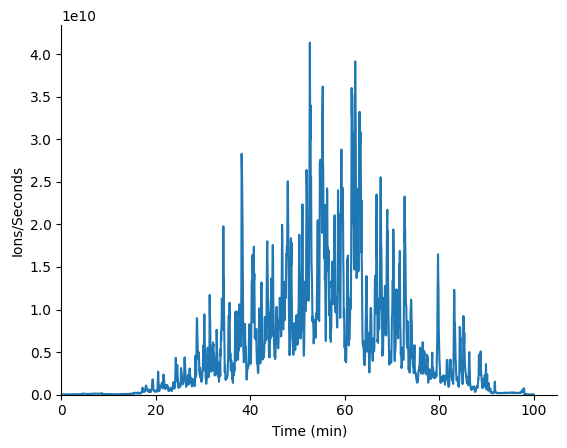

In [22]:
msplot.plot_tic(ms1_df)

`plot_ions` can be used to plot the ions per MS1 scan in a pandas DataFrame.

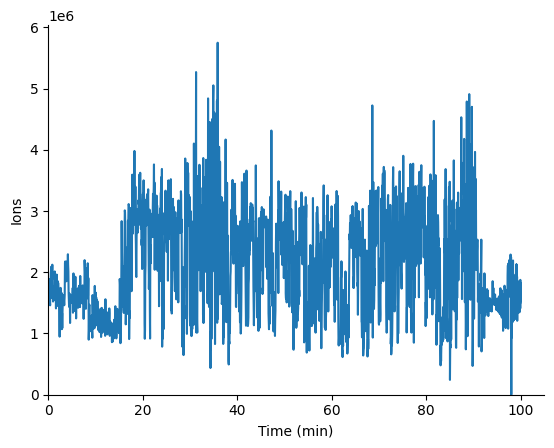

In [12]:
msplot.plot_ions(ms1_df)